#**1. 선형회귀 및 최적화**

##데이터 불러오기 및 전처리

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

1) Real_estate.csv 데이터를 불러온 후 real에 담아주세요. 

In [3]:
from google.colab import files
files.upload()

Saving Real_estate.csv to Real_estate.csv


{'Real_estate.csv': b'transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area\r\n2012.917,32,84.87882,10,24.98298,121.54024,37.9\r\n2012.917,19.5,306.5947,9,24.98034,121.53951,42.2\r\n2013.583,13.3,561.9845,5,24.98746,121.54391,47.3\r\n2013.5,13.3,561.9845,5,24.98746,121.54391,54.8\r\n2012.833,5,390.5684,5,24.97937,121.54245,43.1\r\n2012.667,7.1,2175.03,3,24.96305,121.51254,32.1\r\n2012.667,34.5,623.4731,7,24.97933,121.53642,40.3\r\n2013.417,20.3,287.6025,6,24.98042,121.54228,46.7\r\n2013.5,31.7,5512.038,1,24.95095,121.48458,18.8\r\n2013.417,17.9,1783.18,3,24.96731,121.51486,22.1\r\n2013.083,34.8,405.2134,1,24.97349,121.53372,41.4\r\n2013.333,6.3,90.45606,9,24.97433,121.5431,58.1\r\n2012.917,13,492.2313,5,24.96515,121.53737,39.3\r\n2012.667,20.4,2469.645,4,24.96108,121.51046,23.8\r\n2013.5,13.2,1164.838,4,24.99156,121.53406,34.3\r\n2013.583,35.7,579.2083,2,24.9824,121.54619,50.5\r\n2013.25,0,292.9978,6,24.9

In [4]:
real = pd.read_csv('Real_estate.csv')

real

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


2) 칼럼명들이 너무 길기 때문에 짧게 바꿔줍니다.

In [5]:
real.rename(columns = {"house age":"age","distance to the nearest MRT station":"distance","number of convenience stores":"stores","house price of unit area":"price"},inplace=True)
real.head()

,transaction date,age,distance,stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


3) transaction date 칼럼은 제거합니다.

In [6]:
real = real.drop(["transaction date"],axis=1)
real.head()

,age,distance,stores,latitude,longitude,price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


4) 결측치가 있는지 확인합니다.

In [7]:
real.isnull().sum()

age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [8]:
#y를 price로 지정, X는 나머지 변수로 지정
X = real.drop(["price"],axis=1)
y = real[["price"]]


5) 데이터를 train, test set 으로 나눠주세요. (train:test=7:3, random_state = 42)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

##선형 회귀

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

####1) 모델 fitting

In [11]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

####2) 모델 evaluation

In [12]:
##r2 
r2 = linear.score(X_test,y_test)

##mae, mse
y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print('R^2: ', r2)
print('MSE: ', mse)
print('MAE: ', mae)

R^2:  0.5571283505007861
MSE:  74.05926303147685
MAE:  6.1515212731816025


##확률적 경사하강법 

####1) 경사하강법 구현을 위한 데이터 찾기

StandardScaler()을 scale에 담아주고 scaled된 dataframe을 만드세요.

In [13]:
from sklearn.preprocessing import StandardScaler

##data scaling
scale = StandardScaler()
real_sc = pd.DataFrame(scale.fit_transform(real),columns = real.columns)

In [14]:
real_sc

,age,distance,stores,latitude,longitude,price
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


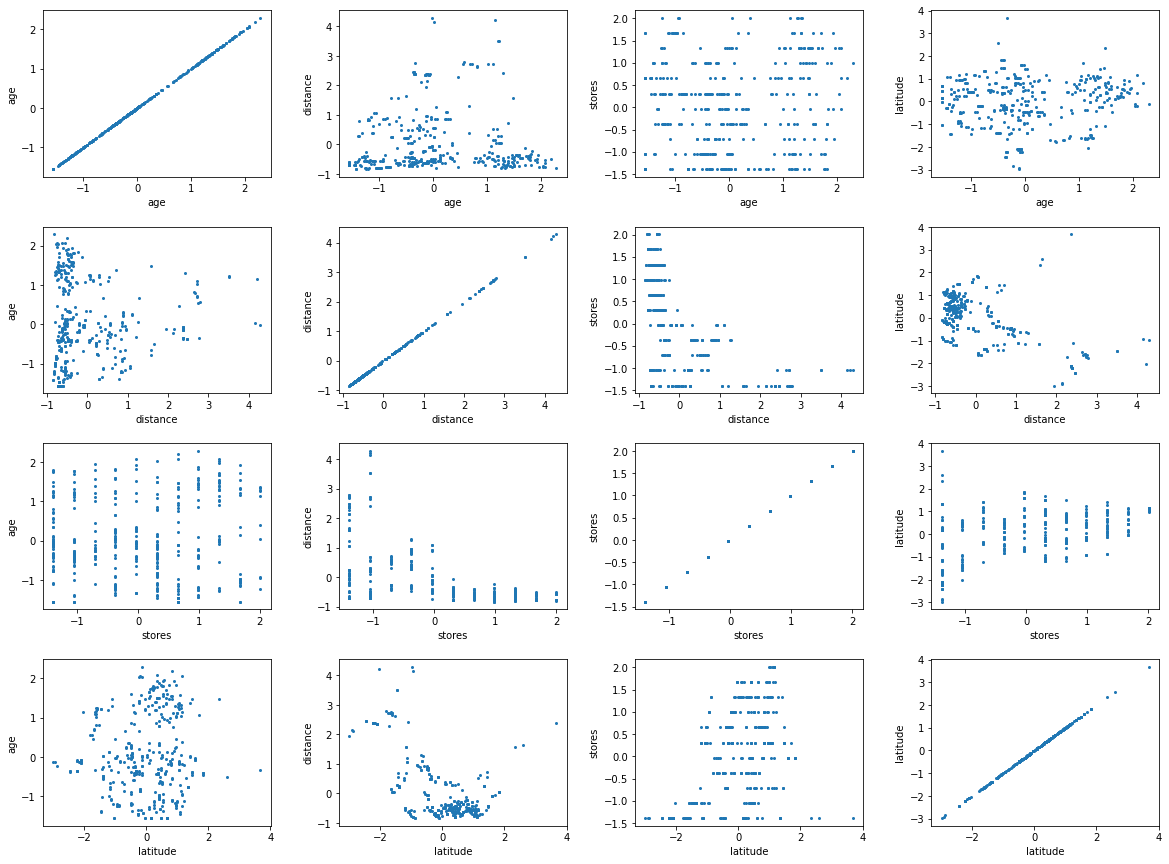

In [15]:
f, axes = plt.subplots(4,4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

col_lis = list(real_sc.columns)
for i in range(4):
  for j in range(4):
    axes[i,j].scatter(real_sc[col_lis[i]],real_sc[col_lis[j]],s = 4)
    axes[i,j].set_xlabel(col_lis[i])
    axes[i,j].set_ylabel(col_lis[j])

plt.show()

**x=distance, y=latitude를 변수로 사용한다**

####2) 확률적 경사하강법을 시행하기 위해 SGDRegressor 패키지 불러오기

max_iter = 1000 \
penalty = None \
learning_rate = 'invscaling' \
eta0 = 0.2

In [16]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(max_iter=1000,penalty=None,learning_rate='invscaling',eta0=0.2)

In [18]:
real_sc

,age,distance,stores,latitude,longitude,price
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


In [19]:
train_set, test_set = train_test_split(real_sc,test_size = 0.3,random_state=42)


#### 3) 데이터를 train, test set으로 나누고 (train:test = 7:3), train 데이터 reshape해주기

In [24]:
'''문제'''
train_set, test_set = train_test_split(real_sc,test_size = 0.3,random_state=42)
X = train_set[["distance"]]
y = train_set[["latitude"]]

X_test = test_set[["distance"]]
y_test = test_set[["latitude"]]

####4) X, y를 SGD에 fit하기

In [23]:
'''문제'''
SGD.fit(X,y)
print('coefficient : ', SGD.coef_)
print('intercept : ', SGD.intercept_)

coefficient :  [-0.69817923]
intercept :  [0.00993226]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####5) MSE 확인하기

In [26]:
y_pred = SGD.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
    ##mse 구하기

0.540021482662582


# **2. 분류 문제**


## 로지스틱 회귀

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 데이터 불러오기

heart.csv는 심장 마비에 대한 dataset입니다. 

**변수 설명** 

| 변수 | 설명 |
|------|------|
| age | 환자의 나이 |
| sex | 환자의 성별 |
| cp | 가슴 통증 타입 (1 = 정형적 협심증; 2 = 비정형 협심증; 3 = 협십증 아닌 통증; 4 = 증상 없음) | 
| trtbps | 안정 혈압(mmHg) |  
| chol | 콜레스테롤 수치 |
| fbs | 공복 혈당 > 120 mg/dl (1 = true; 0 = false) |
| restecg | 안정 심전도 결과 (0 = 정상; 1 = ST-T파 이상; 2 = 좌심실 비대 의심) |
| thalachh | 최대 심장 속도 |
| exng | 운동성 협심증 여부 (1 = yes; 0 = no) |
| oldpeak | Previous peak |
| slp | Slope |  
| ca | major vessel 수 (0 - 3) |
| thall | Thal rate |
| output | 0 = 심장 마비 가능성 낮음; 1 = 심장 마비 가능성 높음 |


heart.csv 데이터를 불러온 후 heart에 담아주세요. 

In [28]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [29]:
heart = pd.read_csv('heart.csv')

heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 필요없는 column 삭제하기
heart의 columns 중 확실하지 않은 데이터인 oldpeak, slp, thall을 삭제해주세요. 

In [30]:
heart = heart.drop(["oldpeak","slp","thall"],axis=1)
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


#### 데이터 확인
(1) column들의 data type을 확인해주세요. 

In [31]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


(2) heart data의 형태(shape)를 확인해주세요. 

In [32]:
heart.shape

(303, 11)

(3) 결측치가 있는지 확인해주세요. 

In [33]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

### 데이터 전처리

#### 'output'을 제외한 column 데이터를 연속형, 범주형으로 나눠서 생성 
연속형 변수 = age, trtbps, chol, thalachh <br>
범주형 변수 = sex, cp, fbs, restecg, exng, caa

In [37]:
# 연속형 
x1 = heart[["age","trtbps","chol","thalachh"]]

# 범주형 
x2 = heart[["sex","cp","fbs","restecg","exng","caa"]]

#### One-Hot Encoding
범주형 변수(x2)를 원 핫 인코딩 해주세요.  

In [41]:
x2_ohe = pd.get_dummies(x2, columns = ["sex","cp","fbs","restecg","exng","caa"])
x2_ohe.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4
0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0
1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0
2,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0
3,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0


x2_ohe와 x1 데이터를 합쳐주세요. 

In [42]:
X = pd.concat([x1,x2_ohe],axis=1)
X

,age,trtbps,chol,thalachh,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,restecg_0,restecg_1,restecg_2,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
1,37,130,250,187,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,41,130,204,172,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
3,56,120,236,178,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,57,120,354,163,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
299,45,110,264,132,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
300,68,144,193,141,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


#### 데이터를 feature와 target으로 나눠주세요. (target은 output, feature는 앞서 얻은 X)

In [43]:
# target 
y = heart[["output"]]

# feature 
X

,age,trtbps,chol,thalachh,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,restecg_0,restecg_1,restecg_2,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
1,37,130,250,187,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,41,130,204,172,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
3,56,120,236,178,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,57,120,354,163,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
299,45,110,264,132,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
300,68,144,193,141,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


#### 데이터를 훈련, 테스트 셋으로 나눠주세요. (test_size = 0.3, random_state = 42)
y의 비율을 맞추서 데이터를 나눠주세요. (stratify) 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

### 모델 생성 및 평가하기

#### LogisticRegression을 통해서 학습을 진행해주세요. 

훈련세트와 테스트세트의 평가 점수를 출력해주세요. 

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
'''문제'''

train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print('훈련세트 : {}'.format(train_score))
print('테스트세트 : {}'.format(test_score))

훈련세트 : 0.8443396226415094
테스트세트 : 0.8021978021978022


#### 분류 결과 확인 
z_vals = X_train의 decision_function 계산값 (특정 y 클래스에 속한다고 믿는 정도이며, 양수면 output이 1이고 음수면 0) <br>
probs = X_train이 분류될 확률 (각 클래스에 대한 확률) <br>
pred = X_train의 분류 예측값 

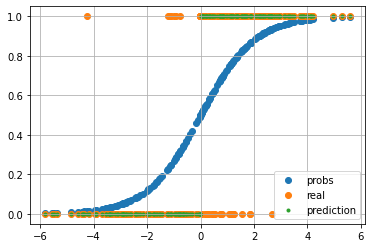

In [47]:
z_vals = lr.decision_function(X_train)
probs = lr.predict_proba(X_train)
pred = lr.predict(X_train)

plt.scatter(z_vals,probs[:,1])
plt.scatter(z_vals,y_train)
plt.scatter(z_vals,pred,marker='.')
plt.legend(['probs','real','prediction'])
plt.grid()
plt.show()

# **3. 서포트 벡터 머신(Support Vector Machines)**

In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn import datasets

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

### **make_moons 데이터를 불러온 후 DataFrame으로 저장하세요.**

make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성합니다. 

data = X, columns = ['x1, 'x2']

In [102]:
X,y = datasets.make_moons(noise=0.1, random_state=42)
#data = '''문제'''
cancer_df = pd.DataFrame(X, columns = ['x1','x2'])
cancer_df['y'] = y
cancer_df



,x1,x2,y
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0
...,...,...,...
95,0.187867,-0.146732,1
96,0.936777,-0.518322,1
97,0.550221,0.724004,0
98,1.887397,-0.013234,1


**y값을 데이터 프레임에 추가한 후 head() 확인해주세요.**

In [103]:
cancer_df['y'] = y
cancer_df.head()

,x1,x2,y
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0


### **데이터에 대하여 시각화를 진행하겠습니다.**

x='x1', y='x2', hue='y'

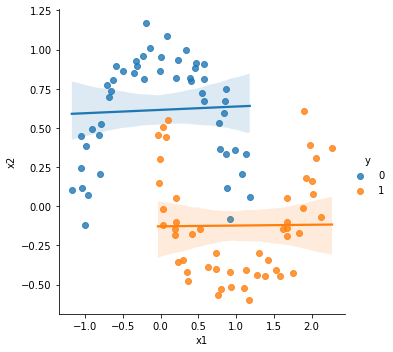

In [104]:
sns.lmplot(data=cancer_df,x='x1', y='x2', hue='y')
plt.xlabel('x1')
plt.ylabel('x2');

데이터 분포를 보았을 때, binary classification 문제입니다. 

또한, 직선을 사용하여 분류할 수 없습니다.

### **먼저 입력 데이터를 표준화하겠습니다.**

In [105]:
SS = StandardScaler()
cancer_SS = SS.fit_transform(cancer_df[['x1','x2']])


### **train_test_split을 이용하여 데이터를 나눠주세요.**

random_state=42

In [106]:
X_train,X_test,y_train,y_test = train_test_split(cancer_SS,cancer_df['y'],test_size = 0.3,random_state=42)

### **사이킷런의 GridSearchCV 클래스를 이용하여 최적의 하이퍼파라미터 탐색**

c 파라미터는 [0.1, 1, 10, 100, 1000]

degree는 [2,3,5]

gamma는 ['auto', 'scale'] 로 하여

linear, poly, rbf를 만드세요.

In [107]:
svc = SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'],'degree': [2,3,5], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['rbf'],'gamma': ['auto', 'scale'], 'C': [0.1, 1, 10, 100, 1000]}]

gs = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=1)

gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']}])

**best_estimator_ 속성에 가장 좋은 모델이 저장되어 있습니다.**

best_svc에 가장 좋은 모델을 저장합니다.

In [108]:
best_svc = gs.best_estimator_

**그리드 서치로 찾은 최적의 매개변수를 출력하세요.**



In [109]:
gs.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

**best_svc로 fit 해주고 점수를 출력합니다.**

In [110]:
best_svc.fit(X_train, y_train)
print(best_svc.score(X_train, y_train))

1.0


### **시각화를 위해 그리드 포인트와 contour 함수를 정의하겠습니다.**

In [111]:
# 시각화를 위해 그리드 포인트 행렬 만들기
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
  return xx, yy
  
# 등고선을 색깔로 표시하기(contourf)
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [112]:
X_ss = TSNE(n_components=2, random_state=42).fit_transform(X)

X0, X1 = X_ss[:, 0], X_ss[:, 1]
xx, yy = make_meshgrid(X0, X1)

### **best_svc를 이용하여 시각화 하겠습니다.**

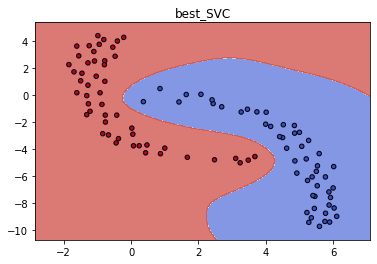

In [113]:
best_svc.fit(X_ss, y)

plot_contours(best_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('best_SVC');

### **wine 데이터를 불러오겠습니다.**

In [79]:
wine = datasets.load_wine()

**wine.data를 X값으로 저장하고 shape를 출력하겠습니다.**

In [80]:
X = wine.data
X.shape

(178, 13)

**wine.target을 y값으로 저장하겠습니다.**

In [81]:
y = wine.target

**target의 구성을 확인해주세요.**

In [85]:
np.unique(y)


array([0, 1, 2])

### **표준화를 진행하겠습니다.**

In [86]:
SS = StandardScaler()
cancer_SS = SS.fit_transform(X)

### **train_test_split을 이용하여 데이터를 나눠주세요.**

random_state=42

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 42)

### **사이킷런의 GridSearchCV 클래스를 이용하여 최적의 하이퍼파라미터 탐색**

In [88]:
svc = SVC(random_state=42)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree': [2,3,5], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'], 'C': [0.1, 1, 10, 100, 1000]}]

gs = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']}])

**best_estimator_ 속성에 가장 좋은 모델이 저장되어 있습니다.**

best_svc에 가장 좋은 모델을 저장합니다.

In [89]:
best_svc = gs.best_estimator_

**그리드 서치로 찾은 최적의 매개변수를 출력하세요.**

In [90]:
gs.best_params_

{'C': 0.1, 'kernel': 'linear'}

**best_svc로 fit 해주고 점수를 출력합니다.**

In [91]:
best_svc.fit(X_train, y_train)
print(best_svc.score(X_train, y_train))

0.9624060150375939


**정확도를 출력합니다.**

In [92]:
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

1.0


**confusion_matrix를 출력하겠습니다.**

In [94]:
from sklearn.metrics import confusion_matrix

svc_matrix = confusion_matrix(y_test,y_pred)

print(svc_matrix)

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


**예측값과 실제값을 DataFrame을 통해 확인하겠습니다.**

In [93]:
# 예측값과 실제값의 일치 확인
comperision = pd.DataFrame({'prediction': y_pred, 'truth': y_test.ravel()})
comperision

,prediction,truth
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2
